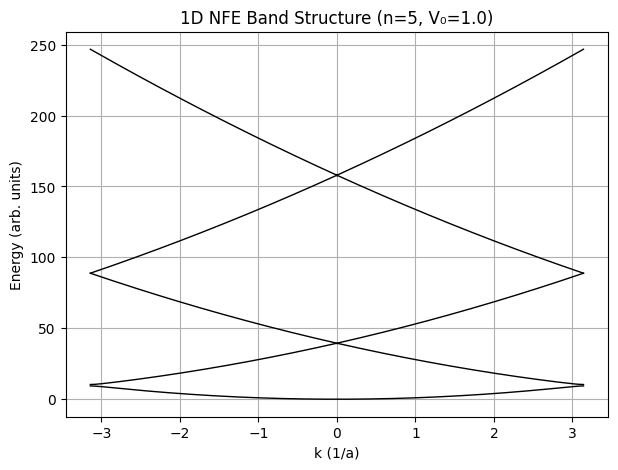

∫Gap(V0)dV0 (Simpson) = 1.995, (Trapezoid) = 1.995


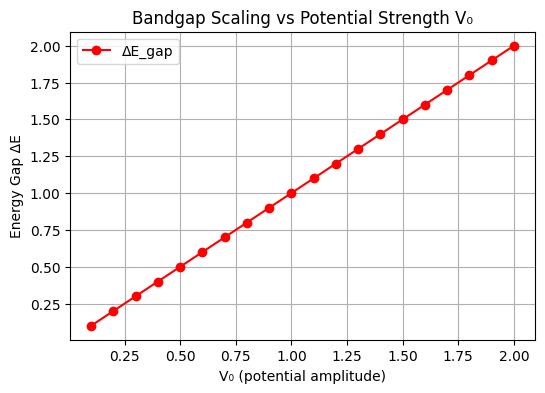

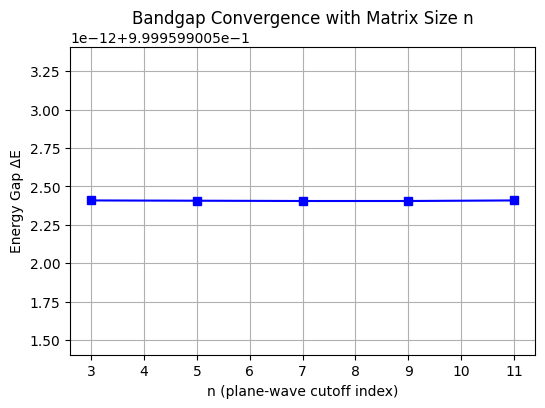

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.integrate import simpson, trapezoid

# ============================================
# 1D Nearly Free Electron (NFE) model
# ============================================

# Physical parameters
a = 1.0                     # Lattice constant
ħ = 1.0                     # Reduced Planck constant (set to 1)
m = 0.5                     # Set 2m = 1 for convenience → E = k^2

# Reciprocal lattice vector
G0 = 2 * np.pi / a

# ============================================
#  Function to build Hamiltonian matrix
# ============================================
def build_H(k, n, V0):
    """
    Construct the central equation matrix for NFE model.
    H_ij = ħ²/2m * |k + G_i|² δ_ij + V_{G_i - G_j}
    """
    G_list = np.arange(-n, n+1) * G0
    size = len(G_list)
    H = np.zeros((size, size), dtype=complex)

    for i, Gi in enumerate(G_list):
        for j, Gj in enumerate(G_list):
            if i == j:
                H[i, j] = (ħ**2 / (2 * m)) * (k + Gi)**2
            elif abs(Gi - Gj) == G0:
                H[i, j] = V0 / 2
    return H

# ============================================
#  Function to compute band energies
# ============================================
def compute_bands(n=3, V0=0.5, Nk=200):
    k_vals = np.linspace(-np.pi/a, np.pi/a, Nk)
    bands = []
    for k in k_vals:
        H = build_H(k, n, V0)
        eigvals = np.sort(eigh(H, eigvals_only=True))
        bands.append(eigvals[:5])  # lowest 5 bands
    return k_vals, np.array(bands)

# ============================================
#  A) Bandgap scaling vs V0
# ============================================
def bandgap_scaling(n=5, V_range=np.linspace(0.1, 2.0, 20)):
    gaps = []
    for V0 in V_range:
        k_vals, bands = compute_bands(n=n, V0=V0, Nk=50)
        E1 = bands[:, 0]
        E2 = bands[:, 1]
        gap = np.min(E2 - E1)
        gaps.append(gap)
    # Integrate for visualization (example use of simpson/trapezoid)
    area_simpson = simpson(gaps, V_range)
    area_trapz = trapezoid(gaps, V_range)
    print(f"∫Gap(V0)dV0 (Simpson) = {area_simpson:.3f}, (Trapezoid) = {area_trapz:.3f}")
    return V_range, np.array(gaps)

# ============================================
#  B) Gap convergence vs n
# ============================================
def gap_convergence(V0=1.0, n_list=[3,5,7,9,11]):
    gaps = []
    for n in n_list:
        k_vals, bands = compute_bands(n=n, V0=V0, Nk=50)
        E1, E2 = bands[:,0], bands[:,1]
        gaps.append(np.min(E2 - E1))
    return n_list, np.array(gaps)

# ============================================
#  Visualization
# ============================================

# 1️⃣ Example band structure
k_vals, bands = compute_bands(n=5, V0=1.0)
plt.figure(figsize=(7,5))
for i in range(bands.shape[1]):
    plt.plot(k_vals, bands[:,i], 'k-', lw=1)
plt.title("1D NFE Band Structure (n=5, V₀=1.0)")
plt.xlabel("k (1/a)")
plt.ylabel("Energy (arb. units)")
plt.grid(True)
plt.show()

# 2️⃣ Bandgap scaling vs V0
V_range, gaps = bandgap_scaling(n=5)
plt.figure(figsize=(6,4))
plt.plot(V_range, gaps, 'r-o', label='ΔE_gap')
plt.title("Bandgap Scaling vs Potential Strength V₀")
plt.xlabel("V₀ (potential amplitude)")
plt.ylabel("Energy Gap ΔE")
plt.legend()
plt.grid(True)
plt.show()

# 3️⃣ Gap convergence vs n
n_list, gap_n = gap_convergence(V0=1.0)
plt.figure(figsize=(6,4))
plt.plot(n_list, gap_n, 'b-s')
plt.title("Bandgap Convergence with Matrix Size n")
plt.xlabel("n (plane-wave cutoff index)")
plt.ylabel("Energy Gap ΔE")
plt.grid(True)
plt.show()
